# BERTopic Twitter
## Tweets with #britishmuseum was collected by Twitter API.

In [7]:
import pandas as pd

In [8]:
df =pd.read_csv('./#britishmuseum_no_retweet_raw.csv')
df=df.drop('text.1', axis=1)
df['query']='#britishmuseum'

In [6]:
df

,date,text,likes,quote,reply,retweet,query
0,2014-06-30,Follow @EY_Foundation launching this Wed #brit...,1,0,1,0,#britishmuseum
1,2014-06-30,"""The exact moment Spotty the Cat realized he w...",0,0,0,0,#britishmuseum
2,2014-06-30,This is me living on the edge. Can you see why...,0,0,0,0,#britishmuseum
3,2014-06-30,#Dish of the day : #Ru ware 1086-1106 #British...,1,0,0,0,#britishmuseum
4,2014-06-30,Watch out kids! #Lion on the rampage in the #B...,4,0,0,5,#britishmuseum
...,...,...,...,...,...,...,...
34986,2022-06-01,Sexy Boy · Air ♂️ https://t.co/j9GOuVpi5g\n#...,0,0,0,0,#britishmuseum
34987,2022-06-01,#TheQueenvisited the @britishmuseum many times...,0,0,0,0,#britishmuseum
34988,2022-06-01,"Koya Abe: After Robert Rich, 2nd Earl of Warwi...",0,0,0,1,#britishmuseum
34989,2022-06-01,Off to London later this week. Anyone been to ...,0,0,0,1,#britishmuseum


In [9]:
#only need year and month
df['date'][0][:-3]

'2014-06'

In [10]:
#only need year and month
def date_to_month(d) :
    result = d[:-3]
    return result



df['date'] = df['date'].apply(date_to_month)

In [11]:
df

,date,text,likes,quote,reply,retweet,query
0,2014-06,Follow @EY_Foundation launching this Wed #brit...,1,0,1,0,#britishmuseum
1,2014-06,"""The exact moment Spotty the Cat realized he w...",0,0,0,0,#britishmuseum
2,2014-06,This is me living on the edge. Can you see why...,0,0,0,0,#britishmuseum
3,2014-06,#Dish of the day : #Ru ware 1086-1106 #British...,1,0,0,0,#britishmuseum
4,2014-06,Watch out kids! #Lion on the rampage in the #B...,4,0,0,5,#britishmuseum
...,...,...,...,...,...,...,...
34986,2022-06,Sexy Boy · Air ♂️ https://t.co/j9GOuVpi5g\n#...,0,0,0,0,#britishmuseum
34987,2022-06,#TheQueenvisited the @britishmuseum many times...,0,0,0,0,#britishmuseum
34988,2022-06,"Koya Abe: After Robert Rich, 2nd Earl of Warwi...",0,0,0,1,#britishmuseum
34989,2022-06,Off to London later this week. Anyone been to ...,0,0,0,1,#britishmuseum


In [12]:
df.sort_values('date', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,date,text,likes,quote,reply,retweet,query
0,2014-06,Follow @EY_Foundation launching this Wed #brit...,1,0,1,0,#britishmuseum
1,2014-06,Bronze votive statue Etrusco-Roman 200-100BC S...,0,0,0,0,#britishmuseum
2,2014-06,Yesterday I spent the full day at the #british...,5,0,0,2,#britishmuseum
3,2014-06,#Britishmuseum #crieale @ British Museum http:...,0,0,0,0,#britishmuseum
4,2014-06,Judy from #BritishMuseum is running a drop-in ...,0,0,0,0,#britishmuseum
...,...,...,...,...,...,...,...
34986,2022-06,My protest at the British Museum 4 years ago t...,0,0,0,0,#britishmuseum
34987,2022-06,@ivan_ruggeri The main block and facade of the...,0,0,0,0,#britishmuseum
34988,2022-06,Demands are growing for #BritishMuseum to retu...,0,0,0,0,#britishmuseum
34989,2022-06,Now at British Museum again to taking new pict...,1,0,0,1,#britishmuseum


### Install packages

In [13]:
import spacy # preprocessing

from tqdm.notebook import tqdm
tqdm.pandas()

from collections import Counter
import regex
import re

from nltk.tokenize import TreebankWordTokenizer

from flashtext import KeywordProcessor
kp = KeywordProcessor()

In [14]:
import spacy

nlp = spacy.load("en_core_web_sm")
spacy_stopwords = nlp.Defaults.stop_words
print(len(spacy_stopwords))
print(type(spacy_stopwords))

326
<class 'set'>


# EDA

In [15]:
df

,date,text,likes,quote,reply,retweet,query
0,2014-06,Follow @EY_Foundation launching this Wed #brit...,1,0,1,0,#britishmuseum
1,2014-06,Bronze votive statue Etrusco-Roman 200-100BC S...,0,0,0,0,#britishmuseum
2,2014-06,Yesterday I spent the full day at the #british...,5,0,0,2,#britishmuseum
3,2014-06,#Britishmuseum #crieale @ British Museum http:...,0,0,0,0,#britishmuseum
4,2014-06,Judy from #BritishMuseum is running a drop-in ...,0,0,0,0,#britishmuseum
...,...,...,...,...,...,...,...
34986,2022-06,My protest at the British Museum 4 years ago t...,0,0,0,0,#britishmuseum
34987,2022-06,@ivan_ruggeri The main block and facade of the...,0,0,0,0,#britishmuseum
34988,2022-06,Demands are growing for #BritishMuseum to retu...,0,0,0,0,#britishmuseum
34989,2022-06,Now at British Museum again to taking new pict...,1,0,0,1,#britishmuseum


In [17]:
df_date=df.groupby('date').count()['text']
df_date

date
2014-06    364
2014-07    320
2014-08    385
2014-09    987
2014-10    474
          ... 
2022-02    234
2022-03    184
2022-04    224
2022-05    279
2022-06    194
Name: text, Length: 97, dtype: int64

<AxesSubplot:xlabel='date'>

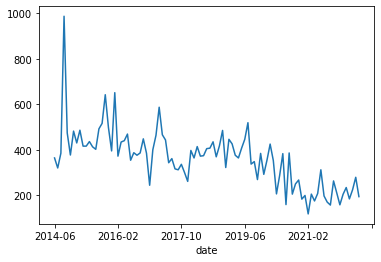

In [19]:
df_date.plot()

### Countvectorizer =>find word frequency

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import pandas as pd

In [21]:
def find_freq(df):
    nlp = spacy.load("en_core_web_sm") #set stopwords by spacy package
    spacy_stopwords = nlp.Defaults.stop_words
    docs =  df['text'].to_list() 
    cv =CountVectorizer(stop_words=spacy_stopwords, max_df=0.7) #set max documents frequency based on data size 
    cv_fit = cv.fit_transform(docs)    
    word_list = cv.get_feature_names() 
    count_list = cv_fit.toarray().sum(axis=0)
    freq_dict=dict(zip(word_list,count_list))
    df_vocab= pd.DataFrame([freq_dict])
    df_vocab=df_vocab.T

    df_vocab.reset_index(inplace=True)
    df_vocab=df_vocab.rename(columns={'index':'word', 0:'freq'})
    df_vocab=df_vocab.sort_values('freq', ascending=False)
    df_vocab.reset_index(drop=True, inplace=True)

    return df_vocab

In [22]:
df_vocab=find_freq(df)

/Users/brightcircle/miniconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(
/Users/brightcircle/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
df_vocab

,word,freq
0,museum,11917
1,london,9706
2,british,9344
3,http,5815
4,amp,2585
...,...,...
80778,atcypznmjn,1
80779,juststopoil,1
80780,justtwothings,1
80781,jusy,1


### BERTopic

install BERTopic 

In [24]:
!pip install bertopic

### BERTopic with K-means and CountVectorizer

In [26]:
# 
from bertopic import BERTopic
from sklearn.cluster import KMeans #By using KMeans as clustering, we can exclude outlier topics
from sklearn.feature_extraction.text import CountVectorizer # remove stopwords with CountVectorizer
docs =  df['text'].to_list() 


vectorizer_model = CountVectorizer(stop_words=spacy_stopwords, max_df=0.9)
cluster_model = KMeans(n_clusters=10) 
topic_model = BERTopic(hdbscan_model=cluster_model, vectorizer_model=vectorizer_model, nr_topics='auto', calculate_probabilities=True)
topics, probs = topic_model.fit_transform(docs)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [27]:
# Topic Summary Table
topic_model.get_topic_info()

,Topic,Count,Name
0,0,8420,0_museum_british_london_architecture
1,1,6866,1_london_amp_thatmuse_history
2,2,6441,2_art_museum_british_london
3,3,3823,3_egypt_egyptian_museum_british
4,4,3058,4_bp_stolen_troy_british
5,5,2447,5_parthenon_greece_marbles_athens
6,6,1536,6_blackhistory_tour_book_place
7,7,1185,7_manga_hokusai_japan_japanese
8,8,664,8_munch_edvardmunch_edvard_booking
9,9,551,9_climatemarch_bpornotbp_held_provoking


In [28]:
# Searching words for each topic
topic_model.get_topic(1)

[('london', 0.05730749564317934),
 ('amp', 0.02079178956489388),
 ('thatmuse', 0.014350612565846398),
 ('history', 0.013955179963467578),
 ('love', 0.013908397346068677),
 ('visit', 0.012592871446093263),
 ('new', 0.012340712731907812),
 ('like', 0.01173891919789129),
 ('british', 0.011620502949381871),
 ('uk', 0.011452152113387466)]

In [29]:

df['topic']=topics

In [31]:
df

,date,text,likes,quote,reply,retweet,query,topic
0,2014-06,Follow @EY_Foundation launching this Wed #brit...,1,0,1,0,#britishmuseum,1
1,2014-06,Bronze votive statue Etrusco-Roman 200-100BC S...,0,0,0,0,#britishmuseum,2
2,2014-06,Yesterday I spent the full day at the #british...,5,0,0,2,#britishmuseum,1
3,2014-06,#Britishmuseum #crieale @ British Museum http:...,0,0,0,0,#britishmuseum,0
4,2014-06,Judy from #BritishMuseum is running a drop-in ...,0,0,0,0,#britishmuseum,1
...,...,...,...,...,...,...,...,...
34986,2022-06,My protest at the British Museum 4 years ago t...,0,0,0,0,#britishmuseum,5
34987,2022-06,@ivan_ruggeri The main block and facade of the...,0,0,0,0,#britishmuseum,0
34988,2022-06,Demands are growing for #BritishMuseum to retu...,0,0,0,0,#britishmuseum,5
34989,2022-06,Now at British Museum again to taking new pict...,1,0,0,1,#britishmuseum,0


In [30]:
topic_model.visualize_topics()

In [32]:
# topic discribtion table

topic_df = topic_model.get_topic_info()
topic_df['words']=0

for idx in topic_df.index :
    word_list=[]
    for j in range(0,10) :
        word_list.append(topic_model.get_topic(idx)[j][0])
    topic_df['words'][idx]=word_list

topic_df

,Topic,Count,Name,words
0,0,8420,0_museum_british_london_architecture,"[museum, british, london, architecture, uk, mu..."
1,1,6866,1_london_amp_thatmuse_history,"[london, amp, thatmuse, history, love, visit, ..."
2,2,6441,2_art_museum_british_london,"[art, museum, british, london, exhibition, his..."
3,3,3823,3_egypt_egyptian_museum_british,"[egypt, egyptian, museum, british, london, ros..."
4,4,3058,4_bp_stolen_troy_british,"[bp, stolen, troy, british, looted, museum, re..."
5,5,2447,5_parthenon_greece_marbles_athens,"[parthenon, greece, marbles, athens, acropolis..."
6,6,1536,6_blackhistory_tour_book_place,"[blackhistory, tour, book, place, essential, m..."
7,7,1185,7_manga_hokusai_japan_japanese,"[manga, hokusai, japan, japanese, exhibition, ..."
8,8,664,8_munch_edvardmunch_edvard_booking,"[munch, edvardmunch, edvard, booking, blackhis..."
9,9,551,9_climatemarch_bpornotbp_held_provoking,"[climatemarch, bpornotbp, held, provoking, per..."


In [33]:
# topics over time based on the date column

timestamps = df['date'].to_list()
docs= df['text'].to_list()
topic_over_time = topic_model.topics_over_time(docs, timestamps)
topic_model.visualize_topics_over_time(topic_over_time)

In [34]:
topic_over_time

,Topic,Words,Frequency,Timestamp,Name
0,0,"museum, british, london, photo, court",80,2014-06-01,0_museum_british_london_architecture
1,1,"london, funslugz, httptcoxcvy4iozut, kids, love",98,2014-06-01,1_london_amp_thatmuse_history
2,2,"vikings, olsx, onn, dtg150614, reclaimthebard",99,2014-06-01,2_art_museum_british_london
3,3,"egyptian, egypt, rosettastone, ancient, wholyh...",54,2014-06-01,3_egypt_egyptian_museum_british
4,4,"creativeresearch, extension, fr, saadiyat, 3m",19,2014-06-01,4_bp_stolen_troy_british
...,...,...,...,...,...
830,4,"stolen, invitation, rsvp, british, pensions",21,2022-06-01,4_bp_stolen_troy_british
831,5,"parthenon, greece, marbles, athens, acropolism...",24,2022-06-01,5_parthenon_greece_marbles_athens
832,6,"book, 16, blackhistory, gmt, 1900",5,2022-06-01,6_blackhistory_tour_book_place
833,7,"armory, whitneybiennial, venicebiennale, koyaa...",5,2022-06-01,7_manga_hokusai_japan_japanese
